In [1]:
%load_ext watermark
%watermark

Last updated: 2023-06-03T17:09:15.756469-03:00

Python implementation: CPython
Python version       : 3.10.9
IPython version      : 8.10.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit



En la sección de análisis de datos, detectamos los siguientes errores en el dataset original

Hay 1506 records duplicados
Las variables desplazamiento, cilindros, transmision y traccion tienen valores inexistentes
hay un outlier en las variables co2 y consumo
Hay coches hibridos y coches electricos (hemos removido estos ultimos ya que no contaminan).
Ninguna variable numérica sigue una distribución normal

In [41]:
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"]=(12,12)

In [11]:
vehiculos=(pd.read_csv(r"C:\Users\54296\Desktop\Data Science\curso_data_science-master\Secciones\Seccion4.Analisis_y_procesado_de_datos\Procesado_de_Datos\data\Vehiculos_original.csv")
            .rename(columns={
                "cylinders":"cilindros",
                "trany":"transmision",
                "make":"fabricante",
                "model":"modelo",
                "displ":"desplazamiento", #volumen de desplazamiento del motor
                "drive":"traccion",
                "VClass":"clase",
                "fuelType":"combustible",
                "comb08":"consumo", #combined MPG for fuelType1
                "co2TailpipeGpm":"co2", # tailpipe CO2 in grams/mile
            })
            .query("co2 >0")
        )

In [7]:
vehiculos.shape

(38436, 11)

RECORDS DUPLICADO

In [12]:
vehiculos = vehiculos.drop_duplicates()

In [13]:
vehiculos.shape

(36791, 11)

### VALORES EXTREMOS 

In [14]:
from scipy import stats
import numpy as np

def outliers_col(df):
    for columna in df:
        if df[columna].dtype != np.object:
            n_outliers = len(df[np.abs(stats.zscore(df[columna])) > 3])    
            print("{} | {} | {}".format(
                df[columna].name,
                n_outliers,
                df[columna].dtype
        ))

outliers_col(vehiculos)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 400 | int64
co2 | 221 | float64


C:\Users\54296\AppData\Local\Temp\ipykernel_15392\510012546.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[columna].dtype != np.object:


In [15]:
vehiculos.describe()

,year,desplazamiento,cilindros,consumo,co2
count,36791.000000,36789.000000,36788.000000,36791.000000,36791.000000
mean,2000.787421,3.321786,5.746493,20.012068,473.185008
std,10.374662,1.359945,1.758009,5.109608,118.833905
min,1984.000000,0.600000,2.000000,7.000000,29.000000
25%,1991.000000,2.200000,4.000000,17.000000,386.391304
50%,2002.000000,3.000000,6.000000,19.000000,466.000000
75%,2010.000000,4.300000,6.000000,23.000000,555.437500
max,2018.000000,8.400000,16.000000,58.000000,1269.571429


In [16]:
consumo_min = vehiculos.consumo.mean() - 3*vehiculos.consumo.std()
consumo_max = vehiculos.consumo.mean() + 3*vehiculos.consumo.std()
print(consumo_min, consumo_max)

co2_min = vehiculos.co2.mean() - 3*vehiculos.co2.std()
co2_max = vehiculos.co2.mean() + 3*vehiculos.co2.std()
print(co2_min, co2_max)

4.6832452329136025 35.34089110477768
116.68329326822334 829.6867227314084


In [17]:
vehiculos = vehiculos[
    (np.abs(stats.zscore(vehiculos.consumo)) < 3)  & \
    (np.abs(stats.zscore(vehiculos.co2)) < 3)
]

In [18]:
vehiculos.shape


(36185, 11)

In [19]:
vehiculos.describe()

,year,desplazamiento,cilindros,consumo,co2
count,36185.000000,36183.000000,36182.000000,36185.000000,36185.000000
mean,2000.799281,3.326051,5.750290,19.842366,473.442286
std,10.342556,1.340777,1.733438,4.587177,110.906946
min,1984.000000,0.900000,2.000000,9.000000,144.000000
25%,1991.000000,2.200000,4.000000,17.000000,394.000000
50%,2002.000000,3.000000,6.000000,19.000000,467.736842
75%,2010.000000,4.300000,6.000000,23.000000,552.000000
max,2018.000000,8.400000,12.000000,35.000000,829.000000


Vemos que aunque hemos removido los outliers, al haber cambiado la distribución del dataset se generan nuevos outliers

In [20]:
outliers_col(vehiculos)

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 213 | int64
co2 | 424 | float64


C:\Users\54296\AppData\Local\Temp\ipykernel_15392\510012546.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[columna].dtype != np.object:


Para eliminar esto simplemente repetimos el proceso hasta que no queden valores extremos

In [21]:
vehiculos = vehiculos[
    (np.abs(stats.zscore(vehiculos.consumo)) < 3)  & \
    (np.abs(stats.zscore(vehiculos.co2)) < 3)
]

outliers_col(vehiculos)
vehiculos.shape

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 0 | int64
co2 | 9 | float64


C:\Users\54296\AppData\Local\Temp\ipykernel_15392\510012546.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[columna].dtype != np.object:


(35548, 11)

In [22]:
vehiculos = vehiculos[
    (np.abs(stats.zscore(vehiculos.consumo)) < 3)  & \
    (np.abs(stats.zscore(vehiculos.co2)) < 3)
]

outliers_col(vehiculos)
vehiculos.shape

year | 0 | int64
desplazamiento | 0 | float64
cilindros | 0 | float64
consumo | 0 | int64
co2 | 0 | float64


C:\Users\54296\AppData\Local\Temp\ipykernel_15392\510012546.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[columna].dtype != np.object:


(35539, 11)

### Valores inexistentes

In [24]:
n_records = len(vehiculos)
def valores_inexistentes_col(df):
    for columna in df:
        print("{} | {} | {}".format(
            df[columna].name, len(df[df[columna].isnull()]) / (1.0*n_records), df[columna].dtype
        ))

valores_inexistentes_col(vehiculos)

fabricante | 0.0 | object
modelo | 0.0 | object
year | 0.0 | int64
desplazamiento | 5.627620360730465e-05 | float64
cilindros | 8.441430541095698e-05 | float64
transmision | 2.8138101803652325e-05 | object
traccion | 0.02093474774191733 | object
clase | 0.0 | object
combustible | 0.0 | object
consumo | 0.0 | int64
co2 | 0.0 | float64


In [25]:
vehiculos_sin_null = vehiculos.dropna(subset=["transmision", "desplazamiento", "cilindros"])

vehiculos_sin_null.shape


(35535, 11)

In [26]:
vehiculos["transmision_imp"] = vehiculos.transmision.fillna("sin transmision")
vehiculos["desplazamiento_imp"] = vehiculos.desplazamiento.fillna(0)
vehiculos["cilindros_imp"] = vehiculos.cilindros.fillna(0)

vehiculos.shape

(35539, 14)

In [27]:
transmision_moda = vehiculos.transmision.mode().values[0]
cilindros_moda = vehiculos.cilindros.mode().values[0]
desplazamiento_mediana = vehiculos.desplazamiento.median()

vehiculos.transmision = vehiculos.transmision.fillna(transmision_moda)
vehiculos.desplazamiento = vehiculos.desplazamiento.fillna(desplazamiento_mediana)
vehiculos.cilindros = vehiculos.cilindros.fillna(cilindros_moda)

In [28]:
vehiculos[vehiculos.transmision_imp=="sin transmision"]

,fabricante,modelo,year,desplazamiento,cilindros,transmision,traccion,clase,combustible,consumo,co2,transmision_imp,desplazamiento_imp,cilindros_imp
15458,GMC,C25 Pickup 2WD,1984,4.1,6.0,Automatic 4-spd,2-Wheel Drive,Standard Pickup Trucks 2WD,Regular,14,634.785714,sin transmision,4.1,6.0


### Normalizacion/Estandardizacion de variables

Hay dos formas en las cuales un dataset puede tener variables que haya que modificar pee a que no sean nulas/repetidas
Generalmente en un dataset las variables van a tener rangos muy distintos

In [29]:
vehiculos.describe()

,year,desplazamiento,cilindros,consumo,co2,desplazamiento_imp,cilindros_imp
count,35539.000000,35539.000000,35539.000000,35539.000000,35539.000000,35539.000000,35539.000000
mean,2000.893188,3.308585,5.727426,19.863277,470.607342,3.308416,5.727089
std,10.308730,1.318233,1.705600,4.383492,104.425820,1.318465,1.706338
min,1984.000000,1.000000,2.000000,10.000000,169.000000,0.000000,0.000000
25%,1991.000000,2.200000,4.000000,17.000000,396.000000,2.200000,4.000000
50%,2002.000000,3.000000,6.000000,19.000000,465.000000,3.000000,6.000000
75%,2010.000000,4.300000,6.000000,23.000000,525.000000,4.300000,6.000000
max,2018.000000,8.400000,12.000000,33.000000,782.000000,8.400000,12.000000


<Axes: ylabel='Density'>

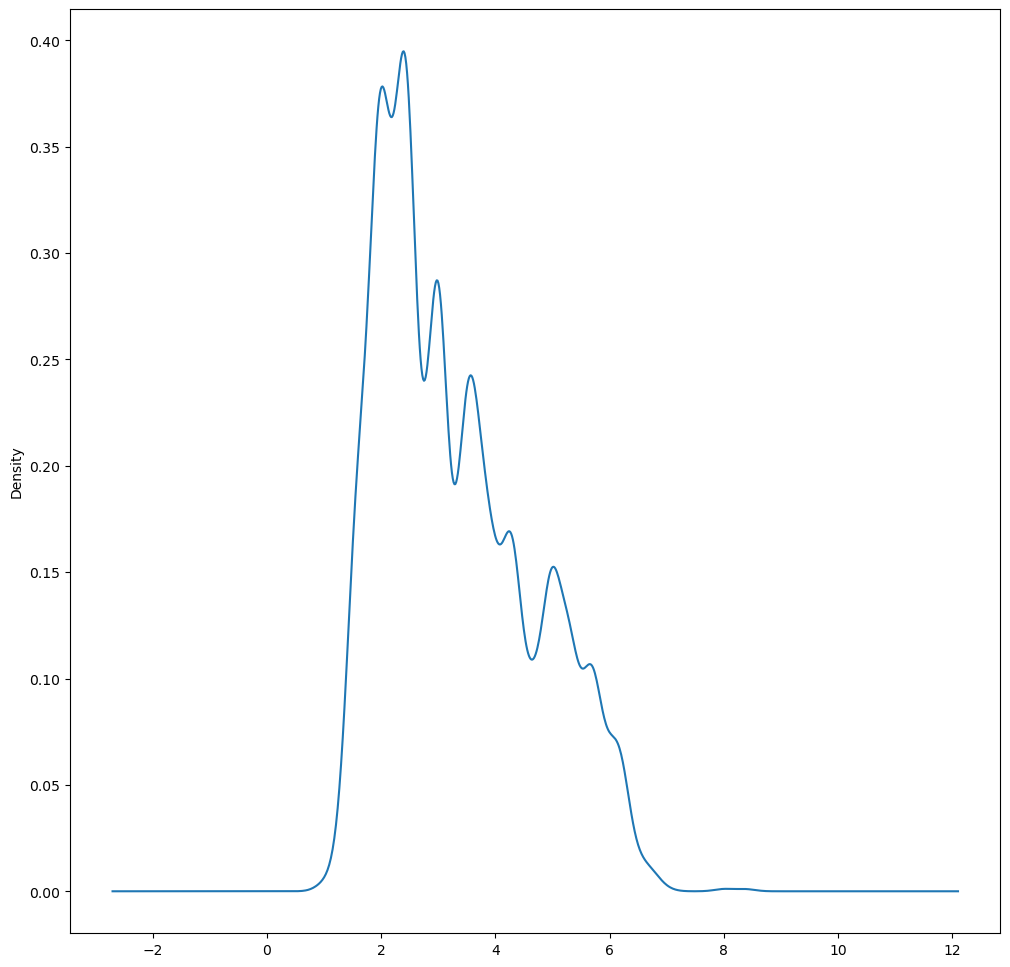

In [30]:
vehiculos.desplazamiento.plot.kde()


In [31]:
from scipy import stats

In [32]:
stats.skew(vehiculos.desplazamiento)

0.6267820075196722

 Normalizacion: 
Convierte una variable numerica con un rango cualquiera a un rango [0,1]

TypeError: 'module' object is not callable

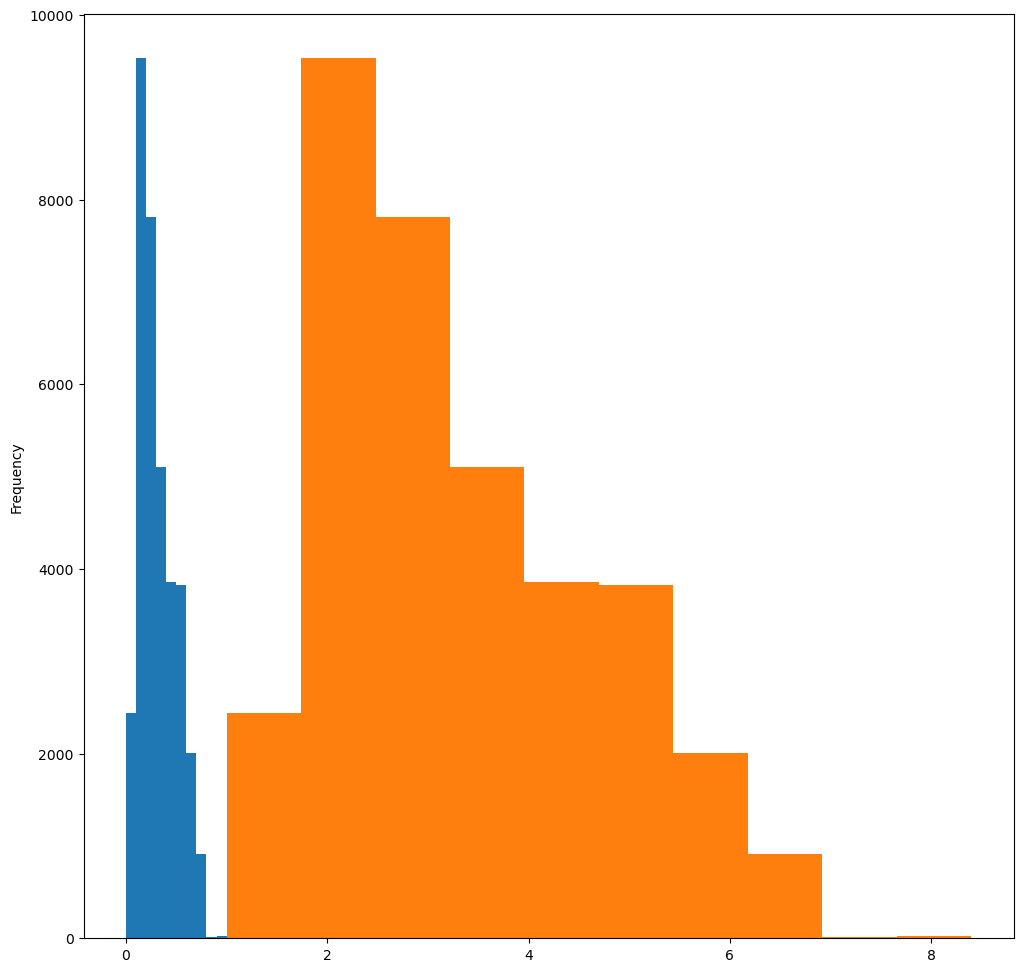

In [34]:
desplazamiento_x_min = vehiculos.desplazamiento.min()
desplazamiento_x_max = vehiculos.desplazamiento.max()

desplazamiento_original = vehiculos.desplazamiento
desplazamiento_normalizado = desplazamiento_original.apply(lambda x: (x-desplazamiento_x_min) / (desplazamiento_x_max - desplazamiento_x_min))

desplazamiento_normalizado.plot.hist(label="normalizado")
desplazamiento_original.plot.hist(label="original")
plt.legend();

# Estandarizacion 
El objetivo es reescalar a una distribucion con media 0 y desviacion estandar 1 

Estandarizar se puede realizar fácilmente convirtiendo cada valor a su puntuación Z, con la formula:

      𝑦−𝜇𝜎/𝜎

TypeError: 'module' object is not callable

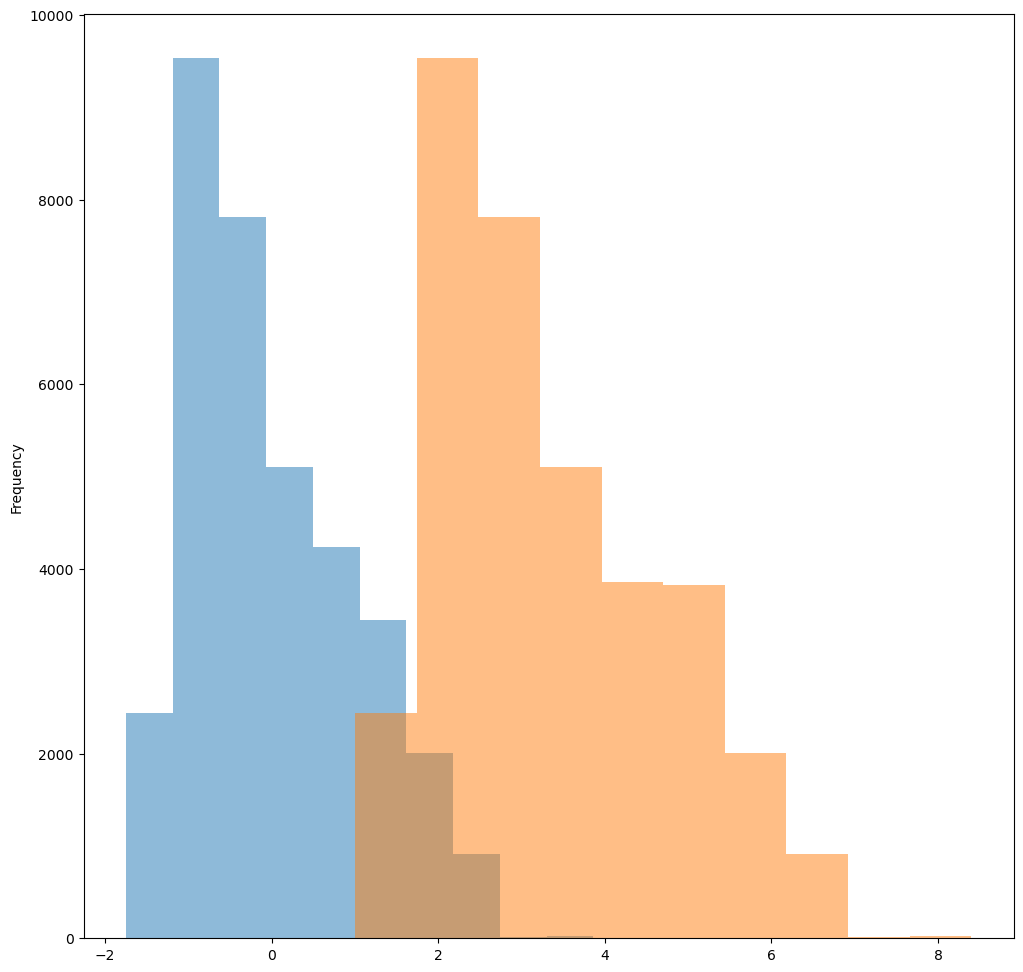

In [38]:
desplazamiento_mu = vehiculos.desplazamiento.mean()
desplazamiento_sigma = vehiculos.desplazamiento.std()

desplazamiento_estandarizado = desplazamiento_original.apply(lambda x: (x-desplazamiento_mu) / desplazamiento_sigma)

desplazamiento_estandarizado.plot.hist(label="standardizado", alpha=0.5)
desplazamiento_original.plot.hist(label="original", alpha=0.5)
plt.legend();

Por ejemplo, vamos a hacer un gráfico de dispersión para ver la comparación de las variables displ (desplazamiento del motor) y comb08 (consumo de combustible) en funcion de si están normalizadas o estandarizadas.

In [39]:
consumo_original = vehiculos.consumo

consumo_mu = consumo_original.mean()
consumo_sigma = consumo_original.std()
consumo_min = consumo_original.min()
consumo_max = consumo_original.max()

consumo_estandarizado = consumo_original.apply(lambda x: (x-consumo_mu)/consumo_sigma)
consumo_normalizado = consumo_original.apply(lambda x: (x-consumo_min)/(consumo_max - consumo_min))

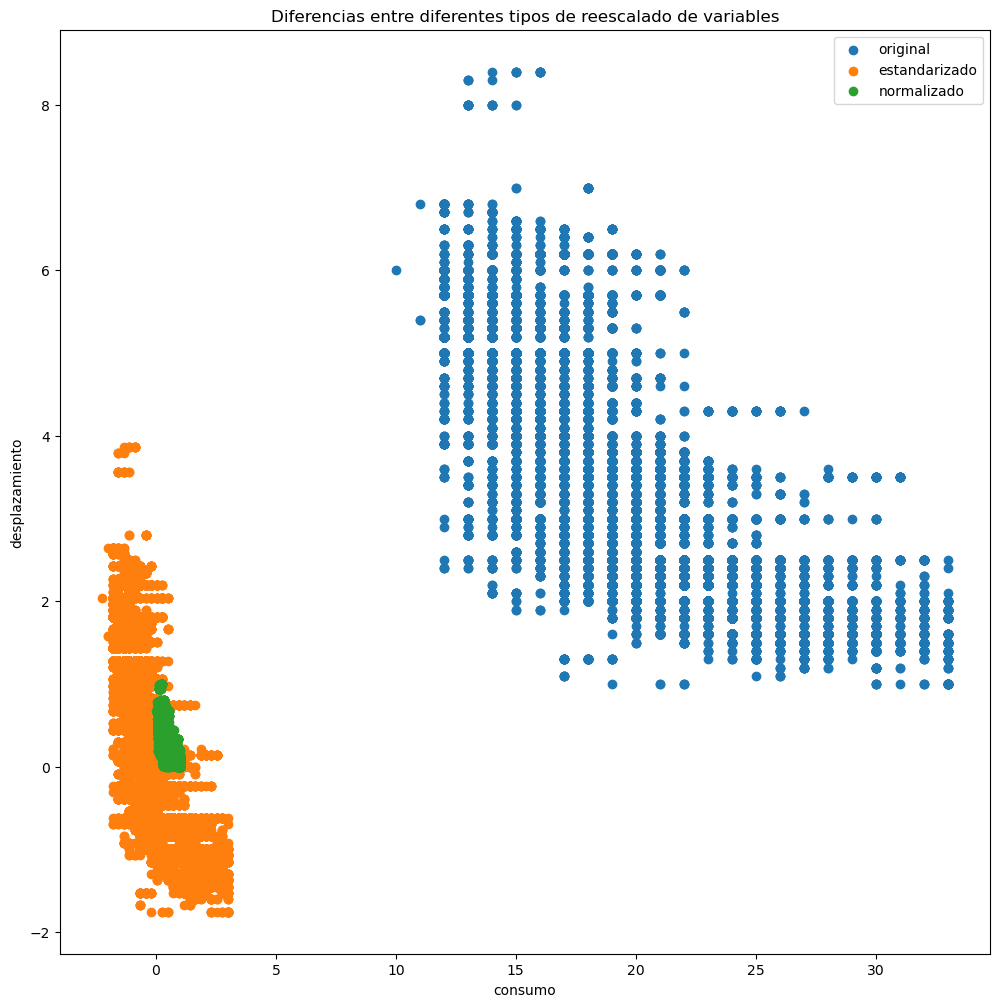

In [42]:
plt.scatter(x=consumo_original,y=desplazamiento_original, label="original")
plt.scatter(x=consumo_estandarizado,y=desplazamiento_estandarizado, label="estandarizado")
plt.scatter(x=consumo_normalizado,y=desplazamiento_normalizado, label="normalizado")

plt.xlabel("consumo")
plt.ylabel("desplazamiento")
plt.title("Diferencias entre diferentes tipos de reescalado de variables")
plt.legend();

In [43]:
vehiculos.to_csv(r"C:\Users\54296\Desktop\Data Science\curso_data_science-master\Secciones\Seccion4.Analisis_y_procesado_de_datos\Procesado_de_Datos\data\Vehiculos_procesado.csv",index=False)